## Pacotes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import scipy.stats as stats

In [657]:
pip install Jinja2

## Dados

### Cidades
Dados das cidades encontrados em: https://en.wikipedia.org/wiki/List_of_American_and_Canadian_cities_by_number_of_major_professional_sports_franchises

In [658]:
# pegando url da página onde se encontra a tabela de interesse
url = "https://en.wikipedia.org/wiki/List_of_American_and_Canadian_cities_by_number_of_major_professional_sports_franchises"
response = requests.get(url)
print(response.status_code)

200


In [659]:
# Transforma a página em texto html
soup = BeautifulSoup(response.text, 'html.parser')

para encontrar a tabela, utilize o inspect na página


![](../input/table_class.jpg)

In [660]:
# Encontra e traz apenas o texto html referente a tabela de interesse
table_data = soup.find('table', {'class': "wikitable"})

In [661]:
# criando uma lista com a tabela
lista=pd.read_html(str(table_data))

In [662]:
# convertendo a lista para dataframe
cities=pd.DataFrame(lista[0])

In [663]:
# limpeza de dados cities (retirando a última linha e mantendo apenas as colunas importantes)
cities=cities.iloc[:-1,[0,3,5,6,7,8]]

In [664]:
# renomeando coluna
cities.rename(columns={'Population (2016 est.)[8]': 'Population_2016'}, inplace=True)

In [665]:
# transformando coluna de população em númerica
cities['Population_2016'] = pd.to_numeric(cities['Population_2016'])

In [666]:
# baixando dados em csv
cities.to_csv("../output/data/cities.csv")

In [667]:
# mantendo apenas as colunas necessárias
cities = cities[['Metropolitan area', 'Population_2016']]

In [668]:
cities

,Metropolitan area,Population_2016
0,New York City,20153634
1,Los Angeles,13310447
2,Chicago,9512999
3,San Francisco Bay Area,6657982
4,Dallas–Fort Worth,7233323
5,"Washington, D.C.",6131977
6,Philadelphia,6070500
7,Miami–Fort Lauderdale,6066387
8,Boston,4794447
9,Minneapolis–Saint Paul,3551036


In [669]:
City = 'New York City'	
State = 'New York'       
query = str(City)+','+str(State)

results = geocoder.geocode(query)   
lat = results[0]['geometry']['lat']
long = results[0]['geometry']['lng']

list_lat.append(lat)
list_long.append(long)

NameError: name 'geocoder' is not defined

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
geolocator = Nominatim(user_agent="geoapiExercises")

<AxesSubplot:title={'center':'População por Área Metropolitana 2016'}, ylabel='Área Metropolitana'>

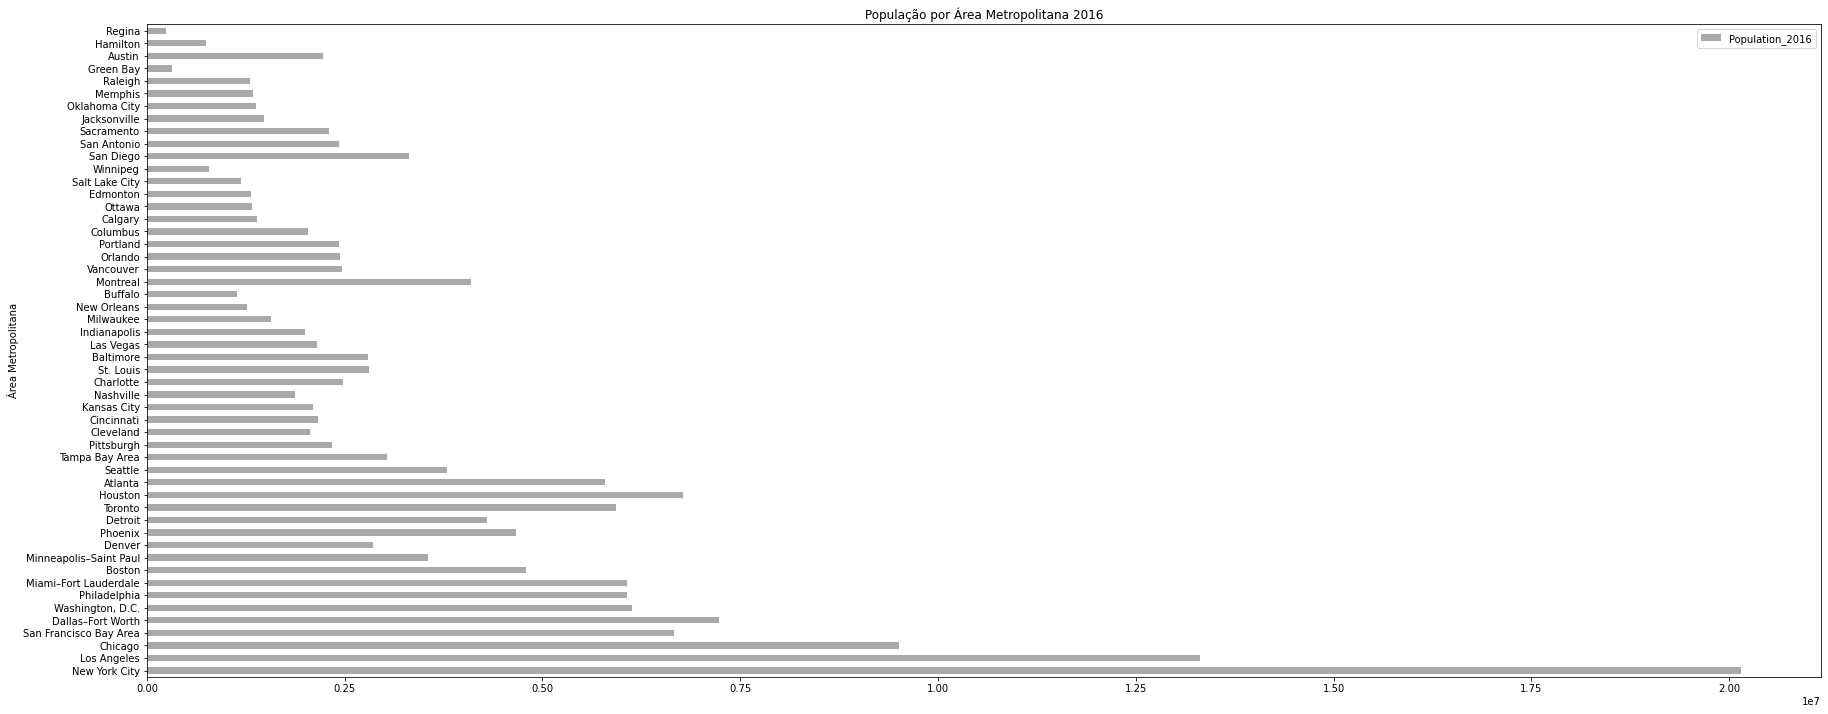

In [ ]:
cities.plot(
    x = 'Metropolitan area',
    y = 'Population_2016', 
    kind='barh', 
    xlabel='Área Metropolitana', 
    ylabel="População (2016)", 
    title="População por Área Metropolitana 2016", 
    color='darkgrey', 
    figsize=(30,12)
    )


### NHL
Dados da NHL encontrados em: https://www.hockey-reference.com/leagues/NHL_2018.html

In [ ]:
# lendo url
url = "https://www.hockey-reference.com/leagues/NHL_2018.html"
nhl = pd.read_html(url, header=0)

In [ ]:
# criando dataframes
nhl_0 = nhl[0]
nhl_1 = nhl[1]

In [ ]:
# juntando os dataframes
frames = [nhl_0, nhl_1]
nhl_df = pd.concat(frames)

In [ ]:
# renomeando coluna
nhl_df.rename(columns={'Unnamed: 0': 'Teams'}, inplace=True)

In [ ]:
# função que retira o * do final de alguns nomes de times
nhl_df['Teams'] = nhl_df['Teams'].map(lambda x: x.rstrip('*'))

In [ ]:
# dicionário relacionando nome do time ao nome da região
dict_city = {
    'Tampa Bay Lightning': 'Tampa Bay Area',
    'Boston Bruins': 'Boston',
    'Toronto Maple Leafs': 'Toronto',
    'Florida Panthers': 'Miami–Fort Lauderdale',
    'Detroit Red Wings': 'Detroit',
    'Montreal Canadiens': 'Montreal',
    'Ottawa Senators': 'Ottawa',
    'Buffalo Sabres': 'Buffalo',
    'Washington Capitals': 'Washington, D.C.',
    'Pittsburgh Penguins': 'Pittsburgh',
    'Philadelphia Flyers': 'Philadelphia',
    'Columbus Blue Jackets': 'Columbus',
    'New Jersey Devils': 'New York City',
    'Carolina Hurricanes': 'Raleigh',
    'New York Islanders': 'New York City',
    'New York Rangers': 'New York City',
    'Nashville Predators': 'Nashville',
    'Winnipeg Jets': 'Winnipeg',
    'Minnesota Wild': 'Minneapolis–Saint Paul',
    'Colorado Avalanche': 'Denver',
    'St. Louis Blues': 'St. Louis',
    'Dallas Stars': 'Dallas–Fort Worth',
    'Chicago Blackhawks': 'Chicago',
    'Vegas Golden Knights': 'Las Vegas',
    'Anaheim Ducks': 'Los Angeles',
    'San Jose Sharks': 'San Francisco Bay Area',
    'Los Angeles Kings': 'Los Angeles',
    'Calgary Flames': 'Calgary',
    'Edmonton Oilers': 'Edmonton',
    'Vancouver Canucks': 'Vancouver',
    'Arizona Coyotes': 'Phoenix'
}

In [ ]:
# função que adiciona o dicionário como coluna no dataframe
nhl_df['Metropolitan area'] = nhl_df['Teams'].map(dict_city)

In [ ]:
# resetando o index
nhl_df = nhl_df.reset_index(drop=True)

In [ ]:
# retirando linhas e resetando o índice
nhl_df = nhl_df.drop([0, 9, 18, 26]).reset_index(drop=True)

In [ ]:
# tornando colunas numéricas para fazer cálculo da razão
nhl_df['W'] = pd.to_numeric(nhl_df['W'])
nhl_df['L'] = pd.to_numeric(nhl_df['L'])

In [ ]:
# relação vitórias/(vitórias + derrotas)
nhl_df['ratio'] = nhl_df['W']/(nhl_df['W'] + nhl_df['L'])

In [ ]:
# ordenando os valores pela razão performance
nhl_df = nhl_df.sort_values(by='ratio', ascending=False)

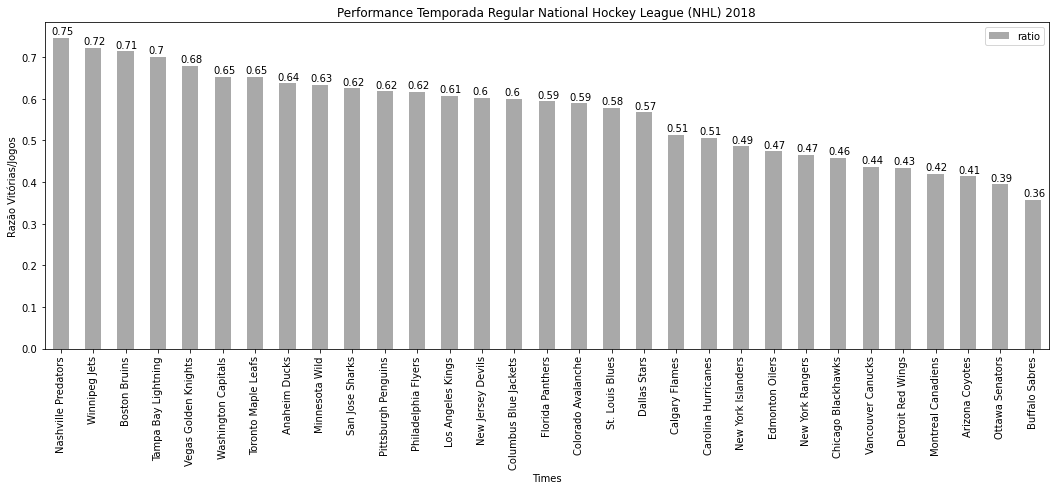

In [ ]:
nhl_df.plot(
    x = 'Teams',
    y = 'ratio', 
    kind='bar', 
    xlabel='Times', 
    ylabel="Razão Vitórias/Jogos", 
    title="Performance Temporada Regular National Hockey League (NHL) 2018", 
    color='darkgrey', 
    figsize=(18,6)
    )

y = nhl_df['ratio'].to_list()

for index, value in enumerate(y):
    plt.text(index - 0.30, value + 0.008, str(round(value, 2)))

In [ ]:
# baixando dados em csv
nhl_df.to_csv("../output/data/nhl.csv")

In [ ]:
# mantendo apenas as colunas necessárias
nhl_df = nhl_df[['Teams', 'Metropolitan area', 'ratio']]

### NBA
Dados da NBA encontrados em: https://www.basketball-reference.com/leagues/NBA_2018.html

In [ ]:
# lendo url
url = "https://www.basketball-reference.com/leagues/NBA_2018.html"
nba = pd.read_html(url, header=0)

In [ ]:
# criando os dataframes
nba_0 = nba[0]
nba_1 = nba[1]

In [ ]:
# renomeando os dataframes
nba_0.rename(columns={'Eastern Conference': 'Teams'}, inplace=True)
nba_1.rename(columns={'Western Conference': 'Teams'}, inplace=True)

In [ ]:
# juntando os dataframes
frames = [nba_0, nba_1]
nba_df = pd.concat(frames)

In [ ]:
# função que retira o '*' da coluna Teams
nba_df['Teams'] = nba_df['Teams'].map(lambda x: x.rstrip('*\xa0'))

In [ ]:
# resetando o index
nba_df = nba_df.reset_index(drop=True)

In [ ]:
# dicionário relacionando nome do time ao nome da região
dict_city = {
    'Toronto Raptors': 'Toronto',
    'Boston Celtics': 'Boston',
    'Philadelphia 76ers': 'Philadelphia',
    'Cleveland Cavaliers': 'Cleveland',
    'Indiana Pacers': 'Indianapolis',
    'Miami Heat': 'Miami–Fort Lauderdale',
    'Milwaukee Bucks': 'Milwaukee',
    'Washington Wizards': 'Washington, D.C.',
    'Detroit Pistons': 'Detroit',
    'Charlotte Hornets': 'Charlotte',
    'New York Knicks': 'New York City',
    'Brooklyn Nets': 'New York City',
    'Chicago Bulls': 'Chicago',
    'Orlando Magic': 'Orlando',
    'Atlanta Hawks': 'Atlanta',
    'Houston Rockets': 'Houston',
    'Golden State Warriors': 'San Francisco Bay Area',
    'Portland Trail Blazers': 'Portland',
    'Oklahoma City Thunder': 'Oklahoma City',
    'Utah Jazz': 'Salt Lake City',
    'New Orleans Pelicans': 'New Orleans',
    'San Antonio Spurs': 'San Antonio',
    'Minnesota Timberwolves': 'Minneapolis–Saint Paul',
    'Denver Nuggets': 'Denver',
    'Los Angeles Clippers': 'Los Angeles',
    'Los Angeles Lakers': 'Los Angeles',
    'Sacramento Kings': 'Sacramento',
    'Dallas Mavericks': 'Dallas–Fort Worth',
    'Memphis Grizzlies': 'Memphis',
    'Phoenix Suns': 'Phoenix'
}

In [ ]:
# função que adiciona o dicionário como coluna no dataframe
nba_df['Metropolitan area'] = nba_df['Teams'].map(dict_city)

In [ ]:
# tornando colunas numéricas para fazer cálculo da razão
nba_df['W'] = pd.to_numeric(nba_df['W'])
nba_df['L'] = pd.to_numeric(nba_df['L'])

In [ ]:
# relação vitórias/(vitórias + derrotas)
nba_df['ratio'] = nba_df['W']/(nba_df['W'] + nba_df['L'])

In [ ]:
# ordenando os valores pela razão performance
nba_df = nba_df.sort_values(by='ratio', ascending=False)

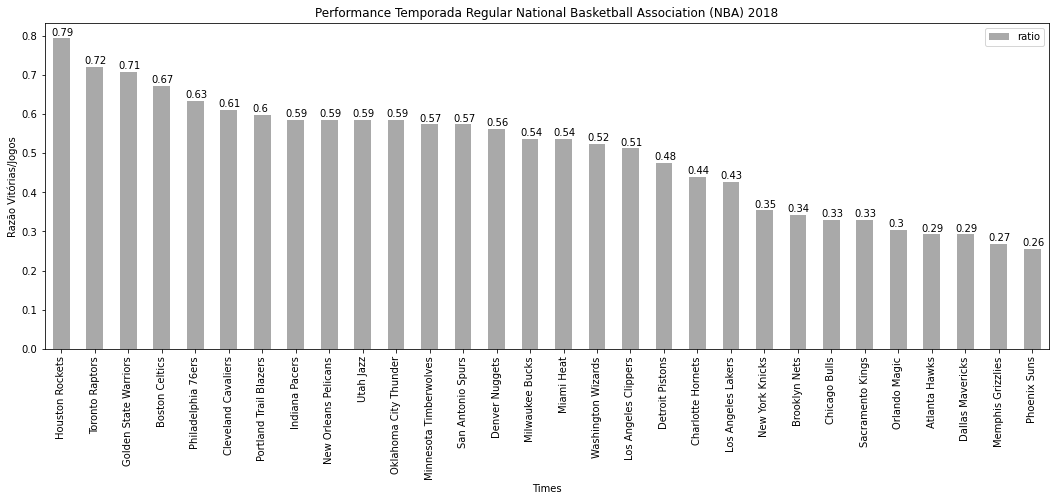

In [ ]:
nba_df.plot(
    x = 'Teams',
    y = 'ratio', 
    kind='bar', 
    xlabel='Times', 
    ylabel="Razão Vitórias/Jogos", 
    title="Performance Temporada Regular National Basketball Association (NBA) 2018", 
    color='darkgrey', 
    figsize=(18,6)
    )

y = nba_df['ratio'].to_list()

for index, value in enumerate(y):
    plt.text(index - 0.30, value + 0.008, str(round(value, 2)))

In [ ]:
# baixando dados em csv
nba_df.to_csv("../output/data/nba.csv")

In [ ]:
# mantendo apenas as colunas necessárias
nba_df = nba_df[['Teams', 'Metropolitan area', 'ratio']]

### MLB
Dados da MLB encontrados em: https://www.baseball-reference.com/leagues/majors/2018.shtml

In [ ]:
# lendo url
url = "https://www.baseball-reference.com/leagues/majors/2018-standings.shtml"
mlb = pd.read_html(url, header=0)


In [ ]:
# criando os dataframes
mlb_0 = mlb[0]
mlb_1 = mlb[1]
mlb_2 = mlb[2]
mlb_3 = mlb[3]
mlb_4 = mlb[4]
mlb_5 = mlb[5]

In [ ]:
# juntando os dataframes
frames = [mlb_0, mlb_1, mlb_2, mlb_3, mlb_4, mlb_5]
mlb_df = pd.concat(frames)

In [ ]:
# resetando o index
mlb_df = mlb_df.reset_index(drop=True)

In [ ]:
# renomeando a coluna do time
mlb_df.rename(columns={'Tm': 'Teams'}, inplace=True)

In [ ]:
# dicionário relacionando nome do time ao nome da região
dict_city = {
    'Boston Red Sox': 'Boston',
    'New York Yankees': 'New York City',
    'Tampa Bay Rays': 'Tampa Bay Area',
    'Toronto Blue Jays': 'Toronto',
    'Baltimore Orioles': 'Baltimore',
    'Cleveland Indians': 'Cleveland',
    'Minnesota Twins': 'Minneapolis–Saint Paul',
    'Detroit Tigers': 'Detroit',
    'Chicago White Sox': 'Chicago',
    'Kansas City Royals': 'Kansas City',
    'Houston Astros': 'Houston',
    'Oakland Athletics': 'San Francisco Bay Area',
    'Seattle Mariners': 'Seattle',
    'Los Angeles Angels': 'Los Angeles',
    'Texas Rangers': 'Dallas–Fort Worth',
    'Atlanta Braves': 'Atlanta',
    'Washington Nationals': 'Washington, D.C.',
    'Philadelphia Phillies': 'Philadelphia',
    'New York Mets': 'New York City',
    'Miami Marlins': 'Miami–Fort Lauderdale',
    'Milwaukee Brewers': 'Milwaukee',
    'Chicago Cubs': 'Chicago',
    'St. Louis Cardinals': 'St. Louis',
    'Pittsburgh Pirates': 'Pittsburgh',
    'Cincinnati Reds': 'Cincinnati',
    'Los Angeles Dodgers': 'Los Angeles',
    'Colorado Rockies': 'Denver',
    'Arizona Diamondbacks': 'Phoenix',
    'San Francisco Giants': 'San Francisco Bay Area',
    'San Diego Padres': 'San Diego'
}

In [ ]:
# função que adiciona o dicionário como coluna no dataframe
mlb_df['Metropolitan area'] = mlb_df['Teams'].map(dict_city)

In [ ]:
# tornando colunas numéricas para fazer cálculo da razão
mlb_df['W'] = pd.to_numeric(mlb_df['W'])
mlb_df['L'] = pd.to_numeric(mlb_df['L'])

In [ ]:
# relação vitórias/(vitórias + derrotas)
mlb_df['ratio'] = mlb_df['W']/(mlb_df['W'] + mlb_df['L'])

In [ ]:
# ordenando os valores pela razão performance
mlb_df = mlb_df.sort_values(by='ratio', ascending=False)

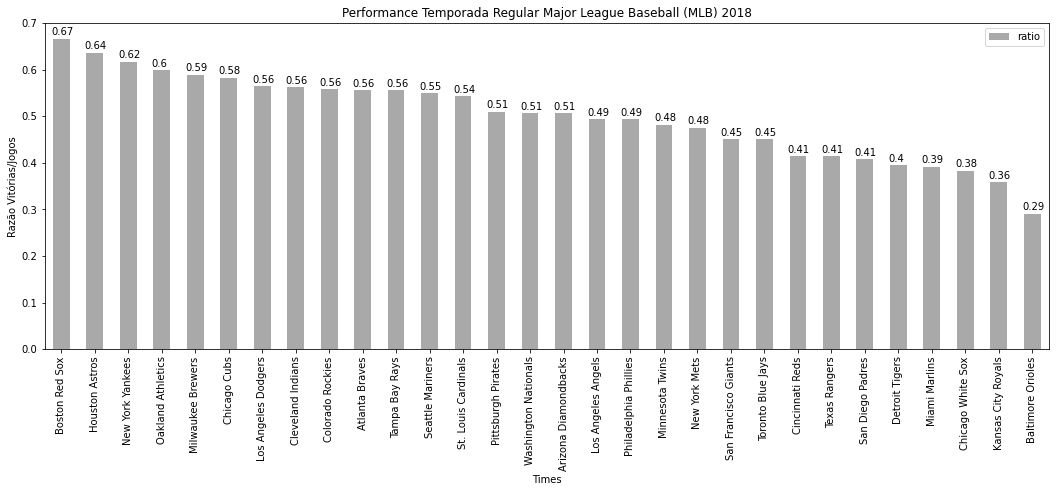

In [ ]:
mlb_df.plot(
    x = 'Teams',
    y = 'ratio', 
    kind='bar', 
    xlabel='Times', 
    ylabel="Razão Vitórias/Jogos", 
    title="Performance Temporada Regular Major League Baseball (MLB) 2018", 
    color='darkgrey', 
    figsize=(18,6)
    )

y = mlb_df['ratio'].to_list()

for index, value in enumerate(y):
    plt.text(index - 0.30, value + 0.008, str(round(value, 2)))

In [ ]:
# baixando dados em csv
mlb_df.to_csv("../output/data/mlb.csv")

In [ ]:
# mantendo apenas as colunas necessárias
mlb_df = mlb_df[['Teams', 'Metropolitan area', 'ratio']]

### NFL
Dados da NFL encontrados em: https://www.pro-football-reference.com/years/2018/

In [ ]:
# lendo url
url = "https://www.pro-football-reference.com/years/2018/"
nfl = pd.read_html(url, header=0)

In [ ]:
# criando os dataframes
nfl_0 = nfl[0]
nfl_1 = nfl[1]

In [ ]:
# juntando os dataframes
frames = [nfl_0, nfl_1]
nfl_df = pd.concat(frames)

In [ ]:
# resetando o index
nfl_df = nfl_df.reset_index(drop=True)

In [ ]:
# renomeando a coluna do time
nfl_df.rename(columns={'Tm': 'Teams'}, inplace=True)

In [ ]:
# função que retira o * e + do final de alguns nomes de times
nfl_df['Teams'] = nfl_df['Teams'].map(lambda x: x.rstrip('*'))
nfl_df['Teams'] = nfl_df['Teams'].map(lambda x: x.rstrip('+'))

In [ ]:
# retirando linhas e resetando o índice
nfl_df = nfl_df.drop([0, 5, 10, 15, 20, 25, 30, 35]).reset_index(drop=True)

In [ ]:
# dicionário relacionando nome do time ao nome da região
dict_city = {
    'New England Patriots': 'Boston',
    'Miami Dolphins': 'Miami–Fort Lauderdale',
    'Buffalo Bills': 'Buffalo',
    'New York Jets': 'New York City',
    'Baltimore Ravens': 'Baltimore',
    'Pittsburgh Steelers': 'Pittsburgh',
    'Cleveland Browns': 'Cleveland',
    'Cincinnati Bengals': 'Cincinnati',
    'Houston Texans': 'Houston',
    'Indianapolis Colts': 'Indianapolis',
    'Tennessee Titans': 'Nashville',
    'Jacksonville Jaguars': 'Jacksonville',
    'Kansas City Chiefs': 'Kansas City',
    'Los Angeles Chargers': 'Los Angeles',
    'Denver Broncos': 'Denver',
    'Oakland Raiders': 'San Francisco Bay Area',
    'Dallas Cowboys': 'Dallas–Fort Worth',
    'Philadelphia Eagles': 'Philadelphia',
    'Washington Redskins': 'Washington, D.C.',
    'New York Giants': 'New York City',
    'Chicago Bears': 'Chicago',
    'Minnesota Vikings': 'Minneapolis–Saint Paul',
    'Green Bay Packers': 'Green Bay',
    'Detroit Lions': 'Detroit',
    'New Orleans Saints': 'New Orleans',
    'Carolina Panthers': 'Charlotte',
    'Atlanta Falcons': 'Atlanta',
    'Tampa Bay Buccaneers': 'Tampa Bay Area',
    'Los Angeles Rams': 'Los Angeles',
    'Seattle Seahawks': 'Seattle',
    'San Francisco 49ers': 'San Francisco Bay Area',
    'Arizona Cardinals': 'Phoenix'
}

In [ ]:
# função que adiciona o dicionário como coluna no dataframe
nfl_df['Metropolitan area'] = nfl_df['Teams'].map(dict_city)

In [ ]:
# tornando colunas numéricas para fazer cálculo da razão
nfl_df['W'] = pd.to_numeric(nfl_df['W'])
nfl_df['L'] = pd.to_numeric(nfl_df['L'])

In [ ]:
# relação vitórias/(vitórias + derrotas)
nfl_df['ratio'] = nfl_df['W']/(nfl_df['W'] + nfl_df['L'])

In [ ]:
# ordenando os valores pela razão performance
nfl_df = nfl_df.sort_values(by='ratio', ascending=False)

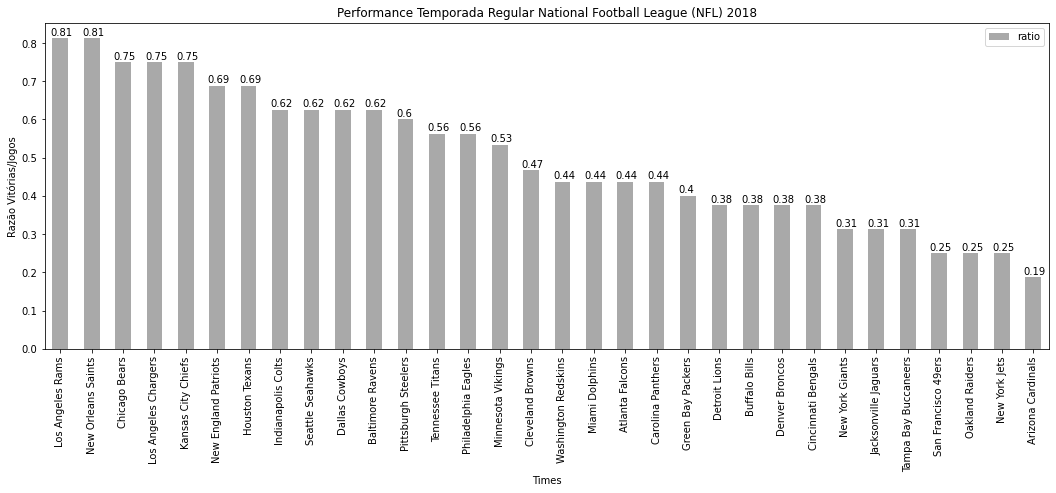

In [ ]:
nfl_df.plot(
    x = 'Teams',
    y = 'ratio', 
    kind='bar', 
    xlabel='Times', 
    ylabel="Razão Vitórias/Jogos", 
    title="Performance Temporada Regular National Football League (NFL) 2018", 
    color='darkgrey', 
    figsize=(18,6)
    )

y = nfl_df['ratio'].to_list()

for index, value in enumerate(y):
    plt.text(index - 0.30, value + 0.008, str(round(value, 2)))

In [ ]:
# baixando dados em csv
nfl_df.to_csv("../output/data/nfl.csv")

In [ ]:
# mantendo apenas as colunas necessárias
nfl_df = nfl_df[['Teams', 'Metropolitan area', 'ratio']]

## Questões

#### Correlação entre Razão Performance de NHL e População

In [ ]:
# unindo os dataframes nhl_df e cities pela area metropolitana
corr_nhl = pd.merge(nhl_df, cities, how = 'left', on = ['Metropolitan area'])

In [ ]:
# tirando a média da razão de performance no caso de dois times pertencerem a mesma região
corr_nhl = corr_nhl.groupby(['Metropolitan area'])['ratio','Population_2016'].mean()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11908\274031992.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  corr_nhl = corr_nhl.groupby(['Metropolitan area'])['ratio','Population_2016'].mean()


In [ ]:
# gerando listas
population_by_region = corr_nhl['Population_2016'].tolist()
ratio_by_region = corr_nhl['ratio'].tolist()

In [ ]:
# tirando a correlação entre as duas listas
stats.pearsonr(population_by_region, ratio_by_region)[0]

0.012486162921209923

#### Correlação entre Razão Performance de NBA e População

In [ ]:
# unindo os dois dataframes
corr_nba = pd.merge(nba_df, cities, how='left', on=['Metropolitan area'])

In [ ]:
# tirando a média da razão de performance no caso de dois times pertencerem a mesma região
corr_nba = corr_nba.groupby('Metropolitan area')['ratio','Population_2016'].mean()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11908\728589221.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  corr_nba = corr_nba.groupby('Metropolitan area')['ratio','Population_2016'].mean()


In [ ]:
# gerando listas
population_by_region = corr_nba['Population_2016'].tolist()
ratio_by_region = corr_nba['ratio'].tolist()

In [ ]:
# tirando a correlação entre as duas listas
stats.pearsonr(population_by_region, ratio_by_region)[0]

-0.17657160252844623

#### Correlação entre Razão Performance de MLB e População

In [ ]:
# unindo os dois dataframes
corr_mlb = pd.merge(mlb_df, cities, how='left', on=['Metropolitan area'])

In [ ]:
# tirando a média da razão de performance no caso de dois times pertencerem a mesma região
corr_mlb = corr_mlb.groupby('Metropolitan area')['ratio','Population_2016'].mean()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11908\2111711154.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  corr_mlb = corr_mlb.groupby('Metropolitan area')['ratio','Population_2016'].mean()


In [ ]:
# gerando listas
population_by_region = corr_mlb['Population_2016'].tolist()
ratio_by_region = corr_mlb['ratio'].tolist()

In [ ]:
# tirando a correlação entre as duas listas
stats.pearsonr(population_by_region, ratio_by_region)[0]

0.15027698302669307

#### Correlação entre Razão Performance de MLB e População

In [ ]:
# unindo os dois dataframes
corr_nfl = pd.merge(nfl_df, cities, how='left', on=['Metropolitan area'])

In [ ]:
# tirando a média da razão de performance no caso de dois times pertencerem a mesma região
corr_nfl = corr_nfl.groupby('Metropolitan area')['ratio','Population_2016'].mean()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11908\2135599210.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  corr_nfl = corr_nfl.groupby('Metropolitan area')['ratio','Population_2016'].mean()


In [ ]:
# gerando listas
population_by_region = corr_nfl['Population_2016'].tolist()
ratio_by_region = corr_nfl['ratio'].tolist()

In [ ]:
# tirando a correlação entre as duas listas
stats.pearsonr(population_by_region, ratio_by_region)[0]

0.004922112149349409

#### Matriz de correlação entre cada liga

In [ ]:
# dropando a coluna população, pois não será mais usada
corr_nhl.drop(columns=['Population_2016'], inplace=True)
corr_nba.drop(columns=['Population_2016'], inplace=True)
corr_mlb.drop(columns=['Population_2016'], inplace=True)
corr_nfl.drop(columns=['Population_2016'], inplace=True)

In [ ]:
# renomeando colunas para não se perder depois
corr_nhl.rename(columns={'ratio': 'ratio_nhl'}, inplace=True)
corr_nba.rename(columns={'ratio': 'ratio_nba'}, inplace=True)
corr_mlb.rename(columns={'ratio': 'ratio_mlb'}, inplace=True)
corr_nfl.rename(columns={'ratio': 'ratio_nfl'}, inplace=True)

In [ ]:
# criando todos dataframes dos pares de ligas com as colunas ratios para cada liga
# usaremos o inner, porque se uma das ligas não tiver time em certa região, não faz sentido calcular a correlação entre elas
nba_nfl = pd.merge(corr_nba, corr_nfl, how='inner', left_index=True, right_index=True)
nba_nhl = pd.merge(corr_nba, corr_nhl, how='inner', left_index=True, right_index=True)
nba_mlb = pd.merge(corr_nba, corr_mlb, how='inner', left_index=True, right_index=True)
nfl_nhl = pd.merge(corr_nfl, corr_nhl, how='inner', left_index=True, right_index=True)
nfl_mlb = pd.merge(corr_nfl, corr_mlb, how='inner', left_index=True, right_index=True)
nhl_mlb = pd.merge(corr_nhl, corr_mlb, how='inner', left_index=True, right_index=True)

In [ ]:
# lista dos esportes
sports = ['NFL', 'NBA', 'NHL', 'MLB']

In [ ]:
# criando um dataframe de valores nan
corr_matrix = pd.DataFrame({k:np.nan for k in sports}, index=sports)

In [ ]:
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        if i==j:
            pass
        elif ((corr_matrix.index[i]=='NFL' and corr_matrix.columns[j]=='NBA')or(corr_matrix.index[i]=='NBA' and corr_matrix.columns[j]=='NFL')):
            corr_matrix.iloc[i][j] = stats.pearsonr(nba_nfl['ratio_nba'],nba_nfl['ratio_nfl'])[0]
            corr_matrix.iloc[j][i] = stats.pearsonr(nba_nfl['ratio_nba'],nba_nfl['ratio_nfl'])[0]
        elif ((corr_matrix.index[i]=='NFL' and corr_matrix.columns[j]=='NHL')or(corr_matrix.index[i]=='NHL' and corr_matrix.columns[j]=='NFL')):
            corr_matrix.iloc[i][j] = stats.pearsonr(nfl_nhl['ratio_nhl'],nfl_nhl['ratio_nfl'])[0]
            corr_matrix.iloc[j][i] = stats.pearsonr(nfl_nhl['ratio_nhl'],nfl_nhl['ratio_nfl'])[0]
        elif ((corr_matrix.index[i]=='NFL' and corr_matrix.columns[j]=='MLB')or(corr_matrix.index[i]=='MLB' and corr_matrix.columns[j]=='NFL')):
            corr_matrix.iloc[i][j] = stats.pearsonr(nfl_mlb['ratio_mlb'],nfl_mlb['ratio_nfl'])[0]
            corr_matrix.iloc[j][i] = stats.pearsonr(nfl_mlb['ratio_mlb'],nfl_mlb['ratio_nfl'])[0]
        elif ((corr_matrix.index[i]=='NBA' and corr_matrix.columns[j]=='NHL')or(corr_matrix.index[i]=='NHL' and corr_matrix.columns[j]=='NBA')):
            corr_matrix.iloc[i][j] = stats.pearsonr(nba_nhl['ratio_nba'],nba_nhl['ratio_nhl'])[0]
            corr_matrix.iloc[j][i] = stats.pearsonr(nba_nhl['ratio_nba'],nba_nhl['ratio_nhl'])[0]
        elif ((corr_matrix.index[i]=='NBA' and corr_matrix.columns[j]=='MLB')or(corr_matrix.index[i]=='MLB' and corr_matrix.columns[j]=='NBA')):
            corr_matrix.iloc[i][j] = stats.pearsonr(nba_mlb['ratio_nba'],nba_mlb['ratio_mlb'])[0]
            corr_matrix.iloc[j][i] = stats.pearsonr(nba_mlb['ratio_nba'],nba_mlb['ratio_mlb'])[0]
        elif ((corr_matrix.index[i]=='NHL' and corr_matrix.columns[j]=='MLB')or(corr_matrix.index[i]=='MLB' and corr_matrix.columns[j]=='NHL')):
            corr_matrix.iloc[i][j] = stats.pearsonr(nhl_mlb['ratio_nhl'],nhl_mlb['ratio_mlb'])[0]
            corr_matrix.iloc[j][i] = stats.pearsonr(nhl_mlb['ratio_nhl'],nhl_mlb['ratio_mlb'])[0]

In [ ]:
stats.pearsonr(nba_nhl['ratio_nba'],nba_nhl['ratio_nhl'])

(0.7604476326183347, 0.0015917528220082923)

In [ ]:
corr_matrix = round(corr_matrix, 3)

In [ ]:
corr_matrix

,NFL,NBA,NHL,MLB
NFL,NaN,0.237,0.304,-0.050
NBA,0.237,NaN,0.760,0.325
NHL,0.304,0.760,NaN,0.432
MLB,-0.050,0.325,0.432,NaN


In [ ]:
corr_matrix.style.to_latex()

'\\begin{tabular}{lrrrr}\n & NFL & NBA & NHL & MLB \\\\\nNFL & nan & 0.237000 & 0.304000 & -0.050000 \\\\\nNBA & 0.237000 & nan & 0.760000 & 0.325000 \\\\\nNHL & 0.304000 & 0.760000 & nan & 0.432000 \\\\\nMLB & -0.050000 & 0.325000 & 0.432000 & nan \\\\\n\\end{tabular}\n'

In [ ]:
corr_matrix.to_csv("../output/tables/corr_matrix.csv")